In [4]:
%matplotlib inline

In [5]:
import ast
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf


# Recipe Recommendation System
### Could it recommend a subtitle too?

## part 1 - Datasets and EDA

https://www.kaggle.com/datasets/elisaxxygao/foodrecsysv1

### 1.0 Recipes

In [6]:
recipes = pd.read_csv("data/foodRecSys-V1_kaggle/raw-data_recipe.csv")
# recipes = pd.read_csv("data/foodRecSys-V1_kaggle/raw-data_recipe.csv", nrows = 10)
recipes

,recipe_id,recipe_name,aver_rate,image_url,review_nums,ingredients,cooking_directions,nutritions,reviews
0,222388,Homemade Bacon,5.000000,https://images.media-allrecipes.com/userphotos...,3,pork belly^smoked paprika^kosher salt^ground b...,{'directions': u'Prep\n5 m\nCook\n2 h 45 m\nRe...,"{u'niacin': {u'hasCompleteData': False, u'name...","{8542392: {'rating': 5, 'followersCount': 11, ..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,https://images.media-allrecipes.com/userphotos...,29,sauerkraut drained^Granny Smith apples sliced^...,{'directions': u'Prep\n15 m\nCook\n2 h 30 m\nR...,"{u'niacin': {u'hasCompleteData': False, u'name...","{3574785: {'rating': 5, 'followersCount': 0, '..."
2,218939,Foolproof Rosemary Chicken Wings,4.571429,https://images.media-allrecipes.com/userphotos...,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{'directions': u""Prep\n20 m\nCook\n40 m\nReady...","{u'niacin': {u'hasCompleteData': True, u'name'...","{13774946: {'rating': 5, 'followersCount': 0, ..."
3,87211,Chicken Pesto Paninis,4.625000,https://images.media-allrecipes.com/userphotos...,163,focaccia bread quartered^prepared basil pesto^...,{'directions': u'Prep\n15 m\nCook\n5 m\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{1563136: {'rating': 5, 'followersCount': 0, '..."
4,245714,Potato Bacon Pizza,4.500000,https://images.media-allrecipes.com/userphotos...,2,red potatoes^strips bacon^Sauce:^heavy whippin...,{'directions': u'Prep\n20 m\nCook\n45 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{2945555: {'rating': 5, 'followersCount': 6690..."
...,...,...,...,...,...,...,...,...,...
49693,222886,Grateful Dead Cocktail,3.500000,https://images.media-allrecipes.com/userphotos...,4,fluid ounce tequila^fluid ounce vodka^fluid ou...,{'directions': u'Prep\n5 m\nReady In\n5 m\nCom...,"{u'niacin': {u'hasCompleteData': False, u'name...","{2043209: {'rating': 5, 'followersCount': 1509..."
49694,25650,Cheese Filling For Pastries,4.333333,https://images.media-allrecipes.com/userphotos...,3,raisins^brandy^cream cheese^white sugar^all-pu...,{'directions': u'Prep\n15 m\nReady In\n15 m\nS...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{1380296: {'rating': 4, 'followersCount': 0, '..."
49695,23544,Peach Smoothie,3.615385,https://images.media-allrecipes.com/userphotos...,21,sliced peaches drained^scoops vanilla ice crea...,{'directions': u'Prep\n1 m\nReady In\n1 m\nIn ...,"{u'niacin': {u'hasCompleteData': False, u'name...","{6412992: {'rating': 4, 'followersCount': 7, '..."
49696,170710,Double Dare Peaches,4.714286,https://images.media-allrecipes.com/userphotos...,19,butter^habanero peppers^fresh peaches^brown su...,{'directions': u'Prep\n20 m\nCook\n10 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{2381248: {'rating': 5, 'followersCount': 2, '..."


In [7]:
recipes.dtypes

recipe_id               int64
recipe_name            object
aver_rate             float64
image_url              object
review_nums             int64
ingredients            object
cooking_directions     object
nutritions             object
reviews                object
dtype: object

The recipe dataset has 9 features - integer id, name, average rating, image url, number of reviews, ingredients, cooking directions, nutrition and reviews.

In [8]:
# not interested in nutrition, url not functional, image in dataset be id

recipes = recipes.drop(columns = ["image_url", "nutritions"]) 
recipes.head(3)

,recipe_id,recipe_name,aver_rate,review_nums,ingredients,cooking_directions,reviews
0,222388,Homemade Bacon,5.000000,3,pork belly^smoked paprika^kosher salt^ground b...,{'directions': u'Prep\n5 m\nCook\n2 h 45 m\nRe...,"{8542392: {'rating': 5, 'followersCount': 11, ..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,29,sauerkraut drained^Granny Smith apples sliced^...,{'directions': u'Prep\n15 m\nCook\n2 h 30 m\nR...,"{3574785: {'rating': 5, 'followersCount': 0, '..."
2,218939,Foolproof Rosemary Chicken Wings,4.571429,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{'directions': u""Prep\n20 m\nCook\n40 m\nReady...","{13774946: {'rating': 5, 'followersCount': 0, ..."


Let's explore numerical values:

In [9]:
recipes.describe().T

,count,mean,std,min,25%,50%,75%,max
recipe_id,49698.0,131092.695119,98230.166389,6663.0,22244.250000,142057.500000,231644.750000,262956.0
aver_rate,49698.0,4.311699,0.485282,0.0,4.081311,4.411765,4.622239,5.0
review_nums,49698.0,76.342408,282.160920,1.0,6.000000,17.000000,54.000000,11191.0


The mean and standard deviation of recipe id have no real meaning, but from the min and max we can see that there are more ids than recipes, which is consistent with the dataset description - only recipes with valid interactions are included, leading to many vacant ids.

We make sure there are no duplicate rows and ids:

In [10]:
assert(recipes.duplicated().sum() == 0)
assert(recipes.duplicated(subset="recipe_id").sum() == 0)

And check for duplicate recipe names:

In [11]:
recipes.duplicated(subset="recipe_name", keep = False).sum() # keep = False for count all duplicates

1186

As expected, names are not unique. We can not explicitly investigate over 1000 recipes, but we can at least see some of the most frequent recipe names:

In [12]:
recipes.recipe_name.value_counts()

recipe_name
Spinach Casserole                            4
Mexican Casserole                            4
English Trifle                               4
Marinated Mushrooms                          4
Three Bean Salad                             4
                                            ..
Parmesan Baskets                             1
Curry Party Mix                              1
Brownie Batter Dip (aka Chocolate Hummus)    1
Spiced Nuts II                               1
All-Purpose Marinara Sauce                   1
Name: count, Length: 49085, dtype: int64

Take the first one as example:

In [14]:
recipes[recipes.recipe_name == "Spinach Casserole"]

,recipe_id,recipe_name,aver_rate,review_nums,ingredients,cooking_directions,reviews
31485,209928,Spinach Casserole,4.444445,43,cottage cheese^eggs^all-purpose flour^sour cre...,{'directions': u'Prep\n10 m\nCook\n55 m\nReady...,"{2978049: {'rating': 5, 'followersCount': 4, '..."
36200,24714,Spinach Casserole,3.212121,27,seashell pasta^frozen chopped spinach thawed a...,{'directions': u'Prep\n10 m\nCook\n25 m\nReady...,"{873103: {'rating': 5, 'followersCount': 0, 'm..."
39265,25892,Spinach Casserole,4.378947,74,frozen chopped spinach thawed and drained^crea...,{'directions': u'Prep\n10 m\nCook\n20 m\nReady...,"{17466433: {'rating': 5, 'followersCount': 0, ..."
40705,18820,Spinach Casserole,4.176471,58,frozen chopped spinach^crumbled feta cheese^sh...,{'directions': u'Prep\n15 m\nCook\n20 m\nReady...,"{540673: {'rating': 5, 'followersCount': 0, 'm..."


Same dish - different recipe. Easiest way to prove the recipes are unique is to account for ingredients as well as name:

In [18]:
recipes[recipes.duplicated(subset=["recipe_name", "ingredients", "cooking_directions"], keep = False)]

,recipe_id,recipe_name,aver_rate,review_nums,ingredients,cooking_directions,reviews
2936,9231,Turkey Tenderloins,4.542484,125,turkey tenderloins^soy sauce^Dijon-style prepa...,{'directions': u'Place the turkey tenderloins ...,"{1469184: {'rating': 4, 'followersCount': 0, '..."
6500,13523,Turkey Tenderloins,4.451613,25,turkey tenderloins^soy sauce^Dijon-style prepa...,{'directions': u'Place the turkey tenderloins ...,"{10003847: {'rating': 5, 'followersCount': 4, ..."
11414,9227,Thanksgiving Meatloaf,4.146667,66,ground turkey^chicken-flavor stuffing mix^eggs...,{'directions': u'Preheat oven to 350 degrees F...,"{4497281: {'rating': 5, 'followersCount': 0, '..."
14309,13534,Thanksgiving Meatloaf,4.057693,51,ground turkey^chicken-flavor stuffing mix^eggs...,{'directions': u'Preheat oven to 350 degrees F...,"{16870435: {'rating': 4, 'followersCount': 1, ..."
18821,9290,German Christmas Gingerbread,4.450000,15,butter^packed brown sugar^eggs^honey^orange li...,"{'directions': u'Whisk together the flours, ba...","{21435077: {'rating': 4, 'followersCount': 0, ..."
18980,7643,German Christmas Gingerbread,4.590909,16,butter^packed brown sugar^eggs^honey^orange li...,"{'directions': u'Whisk together the flours, ba...","{1182080: {'rating': 4, 'followersCount': 0, '..."
19481,9192,Pumpkin Spice Ring,4.250000,2,angel food cake mix^pumpkin puree^pumpkin pie ...,{'directions': u'Combine pumpkin and pumpkin p...,"{294260: {'rating': 4, 'followersCount': 2, 'm..."
20186,13613,Pumpkin Spice Ring,4.111111,8,angel food cake mix^pumpkin puree^pumpkin pie ...,{'directions': u'Combine pumpkin and pumpkin p...,"{394346: {'rating': 5, 'followersCount': 0, 'm..."
20454,9129,Extra Gingery Bread,4.439024,31,all-purpose flour^ground cinnamon^baking soda^...,{'directions': u'Preheat oven to 350 degrees F...,"{854400: {'rating': 5, 'followersCount': 1, 'm..."
20473,13593,Pecan Pie Bars II,4.450000,50,yellow cake mix^margarine softened^egg^eggs^va...,{'directions': u'Preheat oven to 350 degrees F...,"{4330112: {'rating': 5, 'followersCount': 0, '..."


In [1]:
# df.groupby(['location', 'item'])

The average rating is quite high, let's take a closer look at it's distribution:

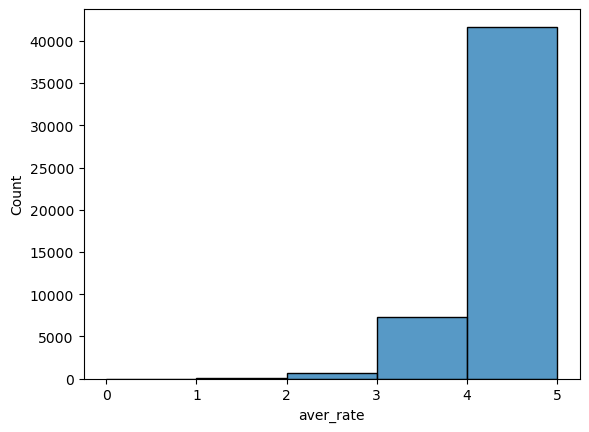

In [19]:
sns.histplot(recipes.aver_rate, binwidth = 1, binrange = [0, 5])
plt.show()

This distribution is probably distorted by the biased sampling - only ratings from reviews that are actual text are included, many more ratings without review are not accounted for. This makes comparing recipes' average rating meaningless.

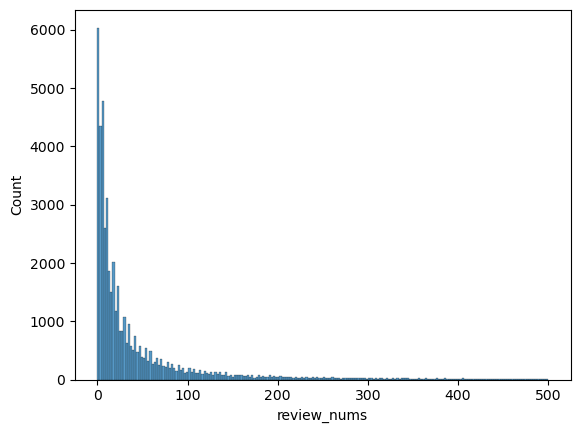

In [22]:
sns.histplot(recipes.review_nums, binrange = [0, 500])
plt.show()

In [23]:
recipes.ingredients = recipes.ingredients.str.split("^")

In [24]:
recipes.ingredients[0]

['pork belly', 'smoked paprika', 'kosher salt', 'ground black pepper']

In [25]:
type(recipes.ingredients[0])

list

In [26]:
recipes.cooking_directions = recipes.cooking_directions.apply(ast.literal_eval)

In [27]:
# Make sure there is only "directions" info
assert(recipes.cooking_directions.apply(lambda x: len(x.keys()) == 1).all())
assert(recipes.cooking_directions.apply(lambda x: list(x.keys())[0] == "directions").all())

In [28]:
recipes.cooking_directions[0]["directions"]

'Prep\n5 m\nCook\n2 h 45 m\nReady In\n11 h 50 m\nPreheat oven to 200 degrees F (95 degrees C).\nSeason pork belly with paprika, salt, and pepper. Tightly wrap pork twice in heavy-duty aluminum foil. Place on a baking sheet and bake in the preheated oven for 2 1/2 hours. Turn off the oven; let pork rest in the oven for 1 hour. Remove meat from oven, leaving it wrapped in aluminum foil, and refrigerate at least 8 hours or overnight.\nRemove pork from foil and slice across the grain in 1/4-inch thick slices. Working in batches, cook pork in a non-stick skillet over medium heat until golden and crisped, 6 to 8 minutes per slice.'

In [29]:
# reduce to string
recipes.cooking_directions = recipes.cooking_directions.apply(lambda x: list(x.values())[0])
assert all(isinstance(directions, str) for directions in recipes.cooking_directions)

In [30]:
print(recipes.cooking_directions[0])

Prep
5 m
Cook
2 h 45 m
Ready In
11 h 50 m
Preheat oven to 200 degrees F (95 degrees C).
Season pork belly with paprika, salt, and pepper. Tightly wrap pork twice in heavy-duty aluminum foil. Place on a baking sheet and bake in the preheated oven for 2 1/2 hours. Turn off the oven; let pork rest in the oven for 1 hour. Remove meat from oven, leaving it wrapped in aluminum foil, and refrigerate at least 8 hours or overnight.
Remove pork from foil and slice across the grain in 1/4-inch thick slices. Working in batches, cook pork in a non-stick skillet over medium heat until golden and crisped, 6 to 8 minutes per slice.


In [31]:
interactions = recipes[["recipe_id", "reviews"]]
interactions


,recipe_id,reviews
0,222388,"{8542392: {'rating': 5, 'followersCount': 11, ..."
1,240488,"{3574785: {'rating': 5, 'followersCount': 0, '..."
2,218939,"{13774946: {'rating': 5, 'followersCount': 0, ..."
3,87211,"{1563136: {'rating': 5, 'followersCount': 0, '..."
4,245714,"{2945555: {'rating': 5, 'followersCount': 6690..."
...,...,...
49693,222886,"{2043209: {'rating': 5, 'followersCount': 1509..."
49694,25650,"{1380296: {'rating': 4, 'followersCount': 0, '..."
49695,23544,"{6412992: {'rating': 4, 'followersCount': 7, '..."
49696,170710,"{2381248: {'rating': 5, 'followersCount': 2, '..."


In [32]:
interactions["reviews"] = interactions.reviews.apply(ast.literal_eval)

C:\Users\diana\AppData\Local\Temp\ipykernel_12068\2344191104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions["reviews"] = interactions.reviews.apply(ast.literal_eval)


In [33]:
type(interactions.reviews[0])

dict

In [34]:
# interactions.assign(reviews = interactions.reviews.map(lambda d: d.items()))

In [35]:
# df_result = (
#     df
#     .assign(dict=df.dict.map(lambda d: d.items()))
#     .explode("dict")
#     .assign(
#         base=lambda df: df.dict.str.get(0),
#         freq=lambda df: df.dict.str.get(1)
#     )
#     .drop(columns="dict")
#     .reset_index(drop=True)
# )

In [36]:
interactions_df = (
    interactions
    .assign(reviews=interactions.reviews.map(lambda d: d.items()))
    .explode("reviews")
    .assign(
        user_id=lambda df: df.reviews.str.get(0),
        user_info=lambda df: df.reviews.str.get(1)
    )
    .drop(columns="reviews")
    .reset_index(drop=True)
)

In [37]:
interactions_df.user_info[0]

{'rating': 5,
 'followersCount': 11,
 'madeRecipesCount': 18,
 'favoritesCount': 200,
 'dateLastModified': '2017-04-22T12:46:43.663',
 'text': "Best breakfast ever! I ran out of paprika while seasoning, so I used garlic piercer on the other half of the batch. Very good! Can't wait to make it again... and figure out how to use the drippings!",
 'followingCount': 0}

In [38]:
interactions_df.shape

(3794003, 3)

In [39]:
interactions = interactions_df

In [40]:
# TODO: export as proper csv, in another notebook maybe

In [41]:
interactions = pd.concat([interactions[["recipe_id", "user_id"]], interactions["user_info"].apply(pd.Series)], axis=1)
interactions

In [ ]:
interactions.to_csv("data/interactions_verbose.csv", index = False)

In [ ]:
recipes[recipes.recipe_id == 6667]

,recipe_id,recipe_name,aver_rate,review_nums,ingredients,cooking_directions,reviews
40594,6667,Cornish Splits,4.333333,87,"[active dry yeast, lukewarm milk, white sugar,...","In a small bowl, dissolve the yeast in the mil...","{3045389: {'rating': 1, 'followersCount': 3, '..."


In [ ]:
# pretty print recipe with matching image by id

In [ ]:
# [item for row in matrix for item in row]

In [ ]:
ingredients_flat = [ingredient for recipe in recipes.ingredients for ingredient in recipe]

In [ ]:
ingredients_counter = Counter(ingredients_flat)

In [ ]:
len(ingredients_counter)

38131

In [ ]:
ingredients_counter.total()

454274

In [ ]:
ingredients_counter.most_common(10)

[('salt', 15070),
 ('butter', 13263),
 ('white sugar', 13032),
 ('all-purpose flour', 10257),
 ('garlic', 8113),
 ('water', 7626),
 ('olive oil', 7531),
 ('vanilla extract', 6507),
 ('milk', 6258),
 ('eggs', 5856)]

In [ ]:
ingredients_counter.most_common()[-20:]

[('jalapeno-stuffed green olives', 1),
 ('fluid ounce) jiggers premium tequila', 1),
 ('fluid ounce) jigger orange liqueur', 1),
 ('fluid ounce) jigger sweetened lime juice', 1),
 ('fluid ounces beer (such as Miller® High Life®)', 1),
 ('fluid ounces cola-flavored carbonated beverage (such as Coca-Cola®)', 1),
 ('fresh red currants', 1),
 ('fluid ounces liquid fruit pectin', 1),
 ('Almond Breeze Coconutmilk Almondmilk Original Unsweetened', 1),
 ('Meyer lemon juiced and peeled', 1),
 ('fluid ounces spiced rum (such as Kraken®)', 1),
 ('fluid ounce freshly squeezed orange juice', 1),
 ('fluid ounce white rum (such as Captain Morgan™)', 1),
 ("fluid ounce dark rum (such as Myers's®)", 1),
 ('fluid ounce hibiscus syrup', 1),
 ('fluid ounce almond orgeat syrup (such as Torani®)', 1),
 ('black beans drained and liquid reserved', 1),
 ('fluid ounces reduced calorie cranberry juice cocktail', 1),
 ('fluid ounces reduced calorie lemonade', 1),
 ('crushed jalapeno and habanero peanut brittle (s

measuring units, brands and preparation methods (squeezed) to be removed for accurate counting -> text processing instead of naive vectorization

from i don't remember which article mean(embedding_title, embedding_ingredients, embedding_directions)

In [ ]:
top_20 = ingredients_counter.most_common(20)
most_common_keys = list(reversed([x[0] for x in top_20]))
most_common_counts = list(reversed([x[1] for x in top_20]))

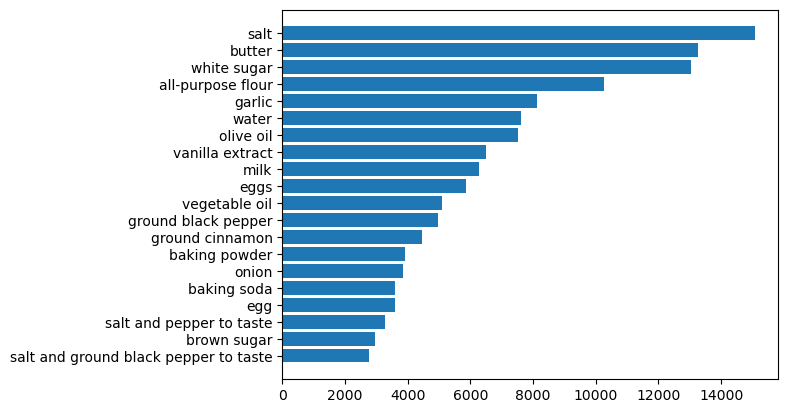

In [ ]:
plt.barh(most_common_keys, most_common_counts)
plt.show()

### 2.0 Ratings

In [ ]:
interactions = pd.read_csv("data/foodRecSys-V1_kaggle/raw-data_interaction.csv")
interactions

,user_id,recipe_id,rating,dateLastModified
0,8542392,222388,5,2017-04-22T12:46:43.663\n
1,11174581,222388,5,2013-06-20T15:50:25.96\n
2,8262477,222388,5,2015-02-14T07:27:51.307\n
3,3574785,240488,5,2017-10-07T18:20:08.973\n
4,12145410,240488,2,2018-01-06T00:06:09.563\n
...,...,...,...,...
3793998,12318233,170710,5,2013-11-03T11:09:47.763\n
3793999,51226,170710,5,2009-07-18T19:33:36.317\n
3794000,1476783,170710,5,2009-07-27T10:21:45.823\n
3794001,1245064,79774,4,2006-01-21T20:57:09.327\n


In [ ]:
interactions.dtypes

user_id              int64
recipe_id            int64
rating               int64
dateLastModified    object
dtype: object

In [ ]:
interactions.dateLastModified = pd.to_datetime(interactions.dateLastModified, format = "ISO8601")

In [ ]:
interactions.describe().T

,count,mean,min,25%,50%,75%,max,std
user_id,3794003.0,4860242.781291,16.0,1404674.0,2954489.0,6384689.0,23463743.0,5010314.802679
recipe_id,3794003.0,61121.799155,6663.0,14235.0,23390.0,78649.0,262956.0,71787.206572
rating,3794003.0,4.513192,1.0,4.0,5.0,5.0,5.0,0.875418
dateLastModified,3794003,2010-10-22 14:10:57.267878656,2000-02-07 21:06:30.137000,2008-02-25 06:23:30.880000,2010-10-25 12:15:48.150000128,2013-12-24 06:31:24.813499904,2018-03-16 07:19:52.260000,NaN


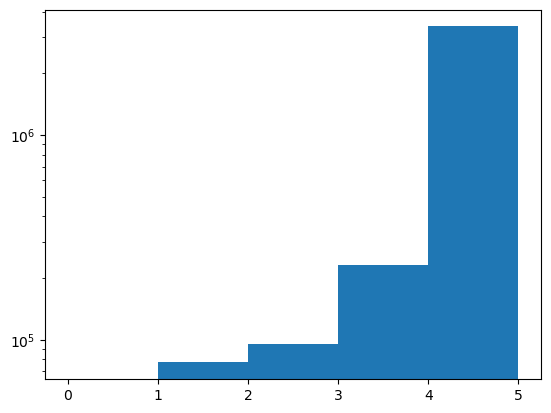

In [ ]:
plt.hist(interactions.rating, bins = range(6),)
plt.semilogy()
plt.show()

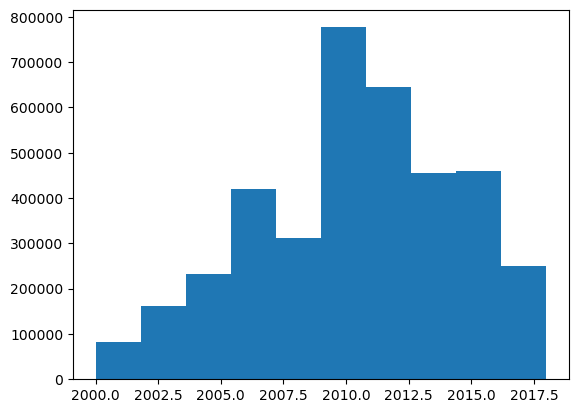

In [ ]:
plt.hist(interactions.dateLastModified.dt.year)
plt.show()